# Task 1 Preguntas teóricas

Responda las siguientes preguntas de forma clara y concisa, pueden subir un PDF o bien dentro del mismo Jupyter Notebook.

1. Investigar el algoritmo AC-3 y su relación con el algoritmo de backtracking search

El algoritmo AC-3, *signfica Arc Consistency 3*. Es un método que se usa para poder cumplir con la consistencia (Arc consistency) en un problema de satisfacción de restricciones CSP. El objetivo es eliminar valores problemáticos o bien inconsistentes del dominio de las variables, por ejemplo eliminar variables en un arco entre un par de variables (x,y), que no cumplen las restricciones entre "x" y "y". Esto ayuda a reducir el espacio de búsqueda antes de aplicar algoritmos. Usualmente el AC-3 forma parte del procesamiento del entorno para simplificar el problema de CSP antes de aplicar Backtracking Search por ejemplo. Cuando decimos que ayuda a simplificar, nos referimos a que elimina valores que seguramente no sean significativos o que no vayan a formar parte de alguna solución. Esto ayuda a hacer más eficiente la busqueda al reducir los errores (backtracks) al ejecutar el algoritmo.

2. Defina en sus propias palabras el término “Arc Consistency”

Primero, un arco es un par de variables relacionadas por una restricción. Cuando se habla de consistencia de Arco ("Arc Consistency"), el termino se refiere a una propiedad en CSP. Esta consistencia significa y asegura que para un par de variables (X1,X2), cada valor en el dominio de X2, tiene al menos un valor compatible en el dominio de X1. Si para todo valor "x" de X1 hay un valor "y" compatible (cuando decimos compatible nos referimos a que cumplen las restricciones) en el dominio X2 el arco entre las variables es consistente.

# Task 2 - CSP con Backtracking, Beam y Local Search

En este ejercicio, implementará tres algoritmos diferentes de satisfacción de restricciones para resolver un problema de programación de exámenes para cuatro estudiantes que toman siete exámenes diferentes. El problema implica calendarizar los exámenes para los estudiantes respetando diversas limitaciones y preferencias.
Restricciones:

* Todos los exámenes deberán realizarse en días diferentes, concretamente lunes, martes y miércoles.
* Ningún estudiante deberá tener más de un examen por día.
* Los estudiantes que toman el mismo curso no pueden tener exámenes programados para el mismo día

### Implementación de backtracking search

#### Configuración del entorno

In [ ]:
from itertools import combinations
import random
import time
from collections import defaultdict

# las reglas estaban raras,pero las interpretamos de la siguiente forma (con corroboración del aux)
# lo resolvimos cumpliendo las siguientes reglas.
#regla 1: Deben ser 7 examenes/asignaciones en total, a lo largo de los 3 días. En un día puede haber más de una asignación. marta hace fisica el lunes y paco algebra el lunes tambien por ejemplo.
#regla 2: cada estudiante solo puede hacer un examen al día
#regla 3: Los estudiantes que comparten un curso, no pueden tener ese examen el mismo día. Si pedro y jose llevan fisica, no pueden tenerlo el mismo día.

#regla extra recomendada: que todos los días haya al menos 1 examen
def inicializar_problema():
    """Configuración inicial del problema"""
    examenes = ["Calculo", "Fisica", "Algebra", "IA", "Algoritmos", "Sistemas", "Geometria"]
    dias = ["Lunes", "Martes", "Miercoles"]
    estudiantes = ["Nelson", "Christian", "Chuy", "Suriano"]

    matricula = {
        "Nelson": ["Calculo", "Algoritmos"],
        "Christian": ["Fisica", "Algebra"],
        "Chuy": ["Sistemas"],
        "Suriano": ["IA", "Geometria"]
    }

    return examenes, dias, estudiantes, matricula

def crear_variables_y_dominios(matricula, dias):
    """Crea las variables y dominios iniciales"""
    variables = [(est, examen) for est, examenes in matricula.items() for examen in examenes]
    dominios = {var: list(dias) for var in variables}
    return variables, dominios


def es_asignacion_valida(var, valor, asignacion, dias):
    """Verifica si una asignación es válida según las restricciones"""
    estudiante, examen = var

    # Regla 2: Un estudiante no puede tener dos exámenes el mismo día
    for (est, ex), dia in asignacion.items():
        if est == estudiante and dia == valor:
            return False

    # Regla 3: Estudiantes que comparten examen no pueden tenerlo el mismo día
    for (est, ex), dia in asignacion.items():
        if ex == examen and dia == valor:
            return False

    # Regla extra: Al final de la asignación, verificar que cada día tenga al menos un examen
    if len(asignacion) == len(dias) * len(asignacion.keys()) // len(dias):
        conteo_dias = defaultdict(int)
        for dia in asignacion.values():
            conteo_dias[dia] += 1
        if any(conteo == 0 for conteo in conteo_dias.values()):
            return False

    return True

def seleccionar_variable_sin_asignar(variables, asignacion):
    """Selecciona la próxima variable a asignar (estrategia simple)"""
    for var in variables:
        if var not in asignacion:
            return var
    return None

In [ ]:
from itertools import combinations
import random
import time
from collections import defaultdict

# las reglas estaban raras,pero las interpretamos de la siguiente forma (con corroboración del aux)
# lo resolvimos cumpliendo las siguientes reglas.
#regla 1: Deben ser 7 examenes/asignaciones en total, a lo largo de los 3 días. En un día puede haber más de una asignación. marta hace fisica el lunes y paco algebra el lunes tambien por ejemplo.
#regla 2: cada estudiante solo puede hacer un examen al día
#regla 3: Los estudiantes que comparten un curso, no pueden tener ese examen el mismo día. Si pedro y jose llevan fisica, no pueden tenerlo el mismo día.

#regla extra recomendada: que todos los días haya al menos 1 examen

def resolver_problema_backtracking():
    """Función principal que resuelve el problema y mide el tiempo"""
    # Inicialización
    examenes, dias, estudiantes, matricula = inicializar_problema()
    variables, dominios = crear_variables_y_dominios(matricula, dias)

    # Algoritmo de backtracking
    def backtracking(asignacion):
        if len(asignacion) == len(variables):
            # Verificar que todos los días tengan al menos un examen
            conteo_dias = defaultdict(int)
            for dia in asignacion.values():
                conteo_dias[dia] += 1
            if all(conteo_dias[dia] > 0 for dia in dias):
                return asignacion
            return None

        var = seleccionar_variable_sin_asignar(variables, asignacion)
        for valor in dominios[var]:
            if es_asignacion_valida(var, valor, asignacion, dias):
                asignacion[var] = valor
                resultado = backtracking(asignacion)
                if resultado is not None:
                    return resultado
                del asignacion[var]
        return None

    # Medición del tiempo
    inicio = time.perf_counter()
    solucion = backtracking({})
    tiempo_ejecucion = time.perf_counter() - inicio

    # Presentación de resultados
    if solucion is None:
        print("No se encontró solución")
        return None, tiempo_ejecucion

    # Organizar resultados por día
    calendario = defaultdict(list)
    for (estudiante, examen), dia in solucion.items():
        calendario[dia].append((estudiante, examen))

    # Mostrar resultados
    print("\nSolución encontrada:")
    for dia in dias:
        print(f"\n{dia}:")
        for estudiante, examen in calendario[dia]:
            print(f"  {estudiante}: {examen}")

    print(f"\nTiempo de ejecución: {tiempo_ejecucion:.6f} segundos")
    return solucion, tiempo_ejecucion

resolver_problema_backtracking()


Solución encontrada:

Lunes:
  Nelson: Calculo
  Christian: Fisica
  Chuy: Sistemas
  Suriano: IA

Martes:
  Nelson: Algoritmos
  Christian: Algebra

Miercoles:
  Suriano: Geometria

Tiempo de ejecución: 0.000041 segundos


({('Nelson', 'Calculo'): 'Lunes',
  ('Nelson', 'Algoritmos'): 'Martes',
  ('Christian', 'Fisica'): 'Lunes',
  ('Christian', 'Algebra'): 'Martes',
  ('Chuy', 'Sistemas'): 'Lunes',
  ('Suriano', 'IA'): 'Lunes',
  ('Suriano', 'Geometria'): 'Miercoles'},
 4.149999995206599e-05)

### Implementación de beam search

In [ ]:
def resolver_problema_beam_search(ancho_beam=3):
    """Resuelve el problema usando Beam Search con el ancho de beam especificado"""
    # Inicialización
    examenes, dias, estudiantes, matricula = inicializar_problema()
    variables, dominios = crear_variables_y_dominios(matricula, dias)

    def evaluar_asignacion_parcial(asignacion):
        """Función heurística para evaluar una asignación parcial"""
        # Contamos cuántas variables están asignadas
        variables_asignadas = len(asignacion)

        # Contamos cuántos días diferentes se utilizan
        dias_utilizados = len(set(asignacion.values()))

        # La heurística favorece asignaciones que usan más días y tienen más variables asignadas
        return variables_asignadas + dias_utilizados

    # Algoritmo de Beam Search
    inicio = time.perf_counter()

    # Estado inicial: asignación vacía
    beam = [{}]

    # Iteramos a través de todas las variables
    for _ in range(len(variables)):
        candidatos = []

        # Para cada estado en el beam actual
        for asignacion in beam:
            # Si ya hemos asignado todas las variables, esta es una solución
            if len(asignacion) == len(variables):
                # Verificar que todos los días tengan al menos un examen
                conteo_dias = defaultdict(int)
                for dia in asignacion.values():
                    conteo_dias[dia] += 1
                if all(conteo_dias[dia] > 0 for dia in dias):
                    tiempo_ejecucion = time.perf_counter() - inicio
                    return asignacion, tiempo_ejecucion

            # Seleccionar la próxima variable a asignar
            var = seleccionar_variable_sin_asignar(variables, asignacion)
            if var is None:
                continue

            # Probar todas las posibles asignaciones para esta variable
            for valor in dominios[var]:
                if es_asignacion_valida(var, valor, asignacion, dias):
                    nueva_asignacion = asignacion.copy()
                    nueva_asignacion[var] = valor
                    # Evaluar la nueva asignación y agregarla a los candidatos
                    puntuacion = evaluar_asignacion_parcial(nueva_asignacion)
                    candidatos.append((nueva_asignacion, puntuacion))

        # Si no hay candidatos, no se encontró solución
        if not candidatos:
            tiempo_ejecucion = time.perf_counter() - inicio
            return None, tiempo_ejecucion

        # Seleccionar los mejores candidatos para el siguiente beam
        candidatos.sort(key=lambda x: x[1], reverse=True)
        beam = [candidato[0] for candidato in candidatos[:ancho_beam]]

    # Si llegamos aquí, tomamos la mejor solución del beam final
    for asignacion in beam:
        # Verificar que todos los días tengan al menos un examen
        conteo_dias = defaultdict(int)
        for dia in asignacion.values():
            conteo_dias[dia] += 1
        if all(conteo_dias[dia] > 0 for dia in dias):
            tiempo_ejecucion = time.perf_counter() - inicio
            return asignacion, tiempo_ejecucion

    tiempo_ejecucion = time.perf_counter() - inicio
    return None, tiempo_ejecucion

# Función para mostrar resultados
def mostrar_resultados(solucion, tiempo_ejecucion, algoritmo):
    """Muestra los resultados de forma organizada"""
    if solucion is None:
        print(f"No se encontró solución usando {algoritmo}")
        return

    # Inicialización para obtener los días
    examenes, dias, estudiantes, matricula = inicializar_problema()

    # Organizar resultados por día
    calendario = defaultdict(list)
    for (estudiante, examen), dia in solucion.items():
        calendario[dia].append((estudiante, examen))

    # Mostrar resultados
    print(f"\nSolución encontrada usando {algoritmo}:")
    for dia in dias:
        print(f"\n{dia}:")
        if dia in calendario:
            for estudiante, examen in calendario[dia]:
                print(f"  {estudiante}: {examen}")
        else:
            print("  (No hay exámenes)")

    print(f"\nTiempo de ejecución: {tiempo_ejecucion:.6f} segundos")

### Implementacion de local search

In [ ]:
def resolver_problema_local_search(max_iteraciones=1000):
    """Resuelve el problema usando Local Search (Hill Climbing)"""
    # Inicialización
    examenes, dias, estudiantes, matricula = inicializar_problema()
    variables, dominios = crear_variables_y_dominios(matricula, dias)

    def contar_violaciones(asignacion):
        """Cuenta el número de restricciones violadas en una asignación"""
        violaciones = 0

        # Verificar restricción: un estudiante no puede tener dos exámenes el mismo día
        for estudiante in set(est for est, _ in asignacion.keys()):
            # Agrupar exámenes por día para cada estudiante
            examenes_por_dia = defaultdict(list)
            for (est, ex), dia in asignacion.items():
                if est == estudiante:
                    examenes_por_dia[dia].append(ex)

            # Contar violaciones (más de un examen por día)
            for dia, exs in examenes_por_dia.items():
                if len(exs) > 1:
                    violaciones += len(exs) - 1

        # Verificar restricción: estudiantes con el mismo examen no pueden tenerlo el mismo día
        for examen in set(ex for _, ex in asignacion.keys()):
            # Agrupar estudiantes por día para cada examen
            estudiantes_por_dia = defaultdict(list)
            for (est, ex), dia in asignacion.items():
                if ex == examen:
                    estudiantes_por_dia[dia].append(est)

            # Contar violaciones (más de un estudiante con el mismo examen el mismo día)
            for dia, ests in estudiantes_por_dia.items():
                if len(ests) > 1:
                    violaciones += len(ests) - 1

        # Verificar que todos los días tengan al menos un examen
        dias_usados = set(asignacion.values())
        violaciones += len(dias) - len(dias_usados)

        return violaciones

    def generar_asignacion_aleatoria():
        """Genera una asignación aleatoria inicial"""
        asignacion = {}
        for var in variables:
            asignacion[var] = random.choice(dias)
        return asignacion

    def obtener_vecinos(asignacion):
        """Genera vecinos cambiando un solo valor de asignación"""
        vecinos = []
        for var in variables:
            for dia in dias:
                if asignacion[var] != dia:
                    vecino = asignacion.copy()
                    vecino[var] = dia
                    vecinos.append(vecino)
        return vecinos

    # Algoritmo de Local Search (Hill Climbing)
    inicio = time.perf_counter()

    # Empezamos con una asignación aleatoria
    asignacion_actual = generar_asignacion_aleatoria()
    mejor_puntuacion = contar_violaciones(asignacion_actual)

    iteracion = 0
    while iteracion < max_iteraciones and mejor_puntuacion > 0:
        # Generar vecinos
        vecinos = obtener_vecinos(asignacion_actual)

        # Encontrar el mejor vecino
        encontrado_mejora = False
        random.shuffle(vecinos)  # Para evitar sesgos en la búsqueda

        for vecino in vecinos:
            puntuacion_vecino = contar_violaciones(vecino)
            if puntuacion_vecino < mejor_puntuacion:
                asignacion_actual = vecino
                mejor_puntuacion = puntuacion_vecino
                encontrado_mejora = True
                break

        # Si no hay mejora, estamos en un mínimo local
        if not encontrado_mejora:
            # Intentamos escapar con un movimiento aleatorio (simulated annealing simplificado)
            if random.random() < 0.3:  # 30% de probabilidad de hacer un movimiento aleatorio
                var = random.choice(variables)
                asignacion_actual[var] = random.choice(dias)
                mejor_puntuacion = contar_violaciones(asignacion_actual)

        iteracion += 1

    tiempo_ejecucion = time.perf_counter() - inicio

    # Si no hay violaciones, hemos encontrado una solución válida
    if mejor_puntuacion == 0:
        return asignacion_actual, tiempo_ejecucion
    else:
        # No encontramos una solución perfecta, pero devolvemos la mejor
        print(f"Advertencia: Local Search no encontró una solución perfecta (violaciones: {mejor_puntuacion})")
        return asignacion_actual, tiempo_ejecucion

### Comparación de algoritmos

In [ ]:
def comparar_algoritmos():
    """Ejecuta y compara todos los algoritmos"""
    print("=" * 50)
    print("COMPARACIÓN DE ALGORITMOS DE CSP")
    print("=" * 50)

    # Ejecutar Backtracking Search
    print("\n1. BACKTRACKING SEARCH")
    print("-" * 30)
    solucion_bt, tiempo_bt = resolver_problema_backtracking()
    mostrar_resultados(solucion_bt, tiempo_bt, "Backtracking Search")

    # Ejecutar Beam Search
    print("\n2. BEAM SEARCH")
    print("-" * 30)
    solucion_beam, tiempo_beam = resolver_problema_beam_search(ancho_beam=3)
    mostrar_resultados(solucion_beam, tiempo_beam, "Beam Search")

    # Ejecutar Local Search
    print("\n3. LOCAL SEARCH")
    print("-" * 30)
    solucion_local, tiempo_local = resolver_problema_local_search(max_iteraciones=1000)
    mostrar_resultados(solucion_local, tiempo_local, "Local Search")

    # Comparar tiempos
    print("\n" + "=" * 50)
    print("COMPARACIÓN DE TIEMPOS DE EJECUCIÓN")
    print("=" * 50)
    print(f"Backtracking Search: {tiempo_bt:.6f} segundos")
    print(f"Beam Search:         {tiempo_beam:.6f} segundos")
    print(f"Local Search:        {tiempo_local:.6f} segundos")

    # Determinar el más rápido
    algoritmos = ["Backtracking Search", "Beam Search", "Local Search"]
    tiempos = [tiempo_bt, tiempo_beam, tiempo_local]
    mas_rapido = algoritmos[tiempos.index(min(tiempos))]

    print(f"\nEl algoritmo más rápido fue: {mas_rapido}")

    return {
        "backtracking": (solucion_bt, tiempo_bt),
        "beam_search": (solucion_beam, tiempo_beam),
        "local_search": (solucion_local, tiempo_local)
    }

# Ejecutar la comparación
comparar_resultados = comparar_algoritmos()

COMPARACIÓN DE ALGORITMOS DE CSP

1. BACKTRACKING SEARCH
------------------------------

Solución encontrada:

Lunes:
  Nelson: Calculo
  Christian: Fisica
  Chuy: Sistemas
  Suriano: IA

Martes:
  Nelson: Algoritmos
  Christian: Algebra

Miercoles:
  Suriano: Geometria

Tiempo de ejecución: 0.000042 segundos

Solución encontrada usando Backtracking Search:

Lunes:
  Nelson: Calculo
  Christian: Fisica
  Chuy: Sistemas
  Suriano: IA

Martes:
  Nelson: Algoritmos
  Christian: Algebra

Miercoles:
  Suriano: Geometria

Tiempo de ejecución: 0.000042 segundos

2. BEAM SEARCH
------------------------------

Solución encontrada usando Beam Search:

Lunes:
  Nelson: Calculo
  Christian: Algebra
  Chuy: Sistemas
  Suriano: IA

Martes:
  Nelson: Algoritmos
  Suriano: Geometria

Miercoles:
  Christian: Fisica

Tiempo de ejecución: 0.000130 segundos

3. LOCAL SEARCH
------------------------------

Solución encontrada usando Local Search:

Lunes:
  Nelson: Algoritmos
  Christian: Algebra
  Suriano:

### Algunas graficas para enriquecer la visualización de resultados

COMPARACIÓN DE ALGORITMOS DE CSP

1. BACKTRACKING SEARCH
------------------------------

Solución encontrada:

Lunes:
  Nelson: Calculo
  Christian: Fisica
  Chuy: Sistemas
  Suriano: IA

Martes:
  Nelson: Algoritmos
  Christian: Algebra

Miercoles:
  Suriano: Geometria

Tiempo de ejecución: 0.000037 segundos

Solución encontrada usando Backtracking Search:

Lunes:
  Nelson: Calculo
  Christian: Fisica
  Chuy: Sistemas
  Suriano: IA

Martes:
  Nelson: Algoritmos
  Christian: Algebra

Miercoles:
  Suriano: Geometria

Tiempo de ejecución: 0.000037 segundos

2. BEAM SEARCH
------------------------------

Solución encontrada usando Beam Search:

Lunes:
  Nelson: Calculo
  Christian: Algebra
  Chuy: Sistemas
  Suriano: IA

Martes:
  Nelson: Algoritmos
  Suriano: Geometria

Miercoles:
  Christian: Fisica

Tiempo de ejecución: 0.000127 segundos

3. LOCAL SEARCH
------------------------------

Solución encontrada usando Local Search:

Lunes:
  Nelson: Algoritmos
  Christian: Algebra
  Suriano:

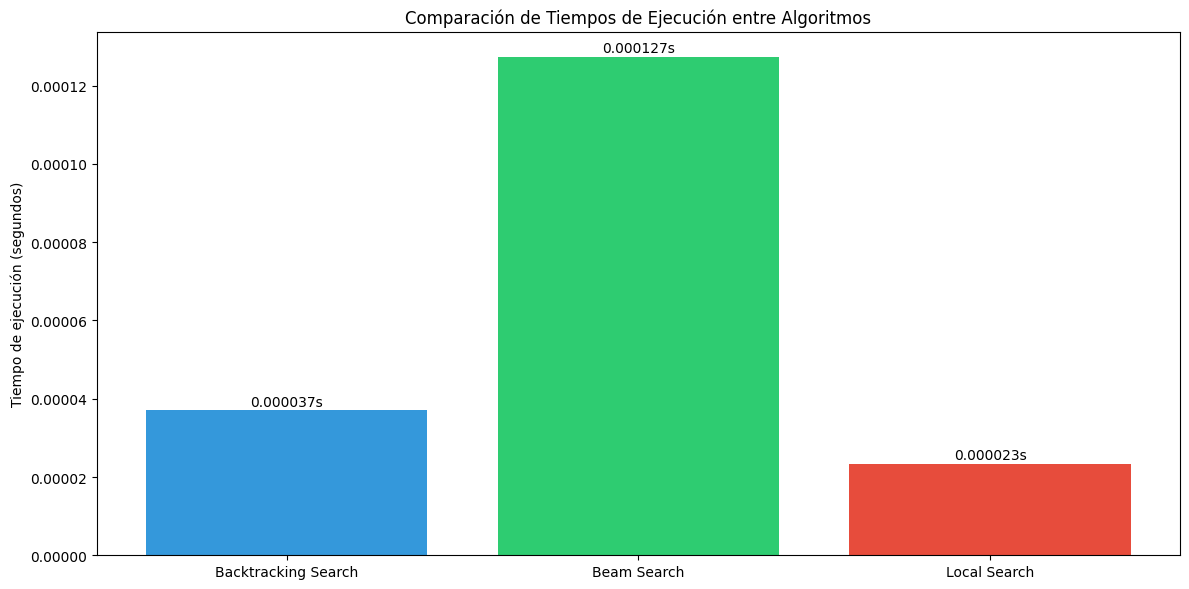

<Figure size 1400x800 with 0 Axes>

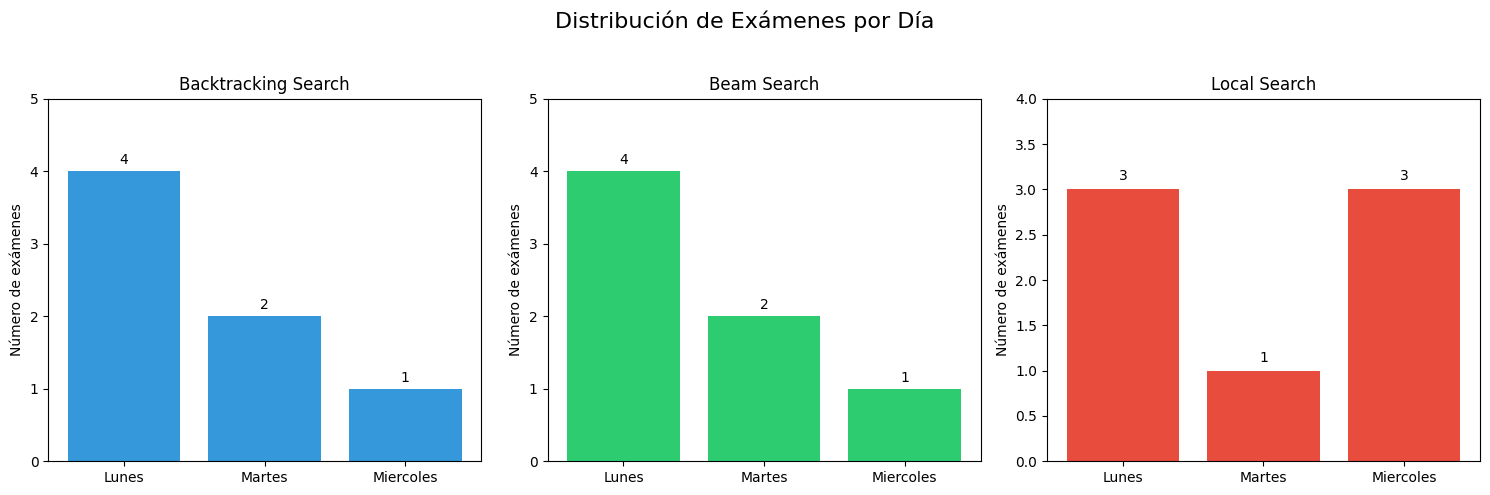

<Figure size 1000x800 with 0 Axes>

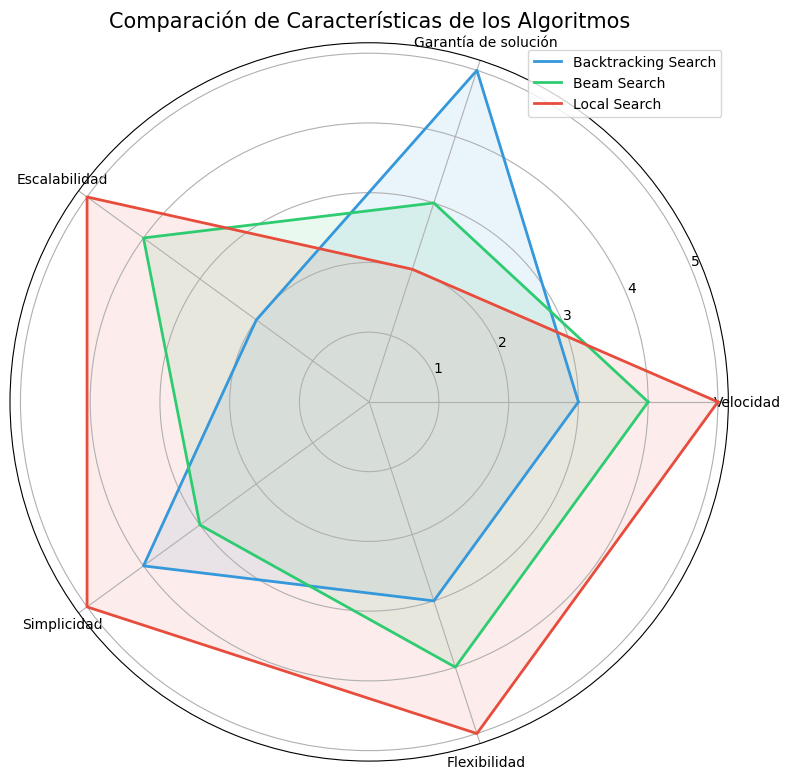

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

def visualizar_comparacion_algoritmos(resultados):
    """
    Crea visualizaciones comparativas de los resultados de los algoritmos.

    Args:
        resultados: Diccionario con resultados {algoritmo: (solución, tiempo)}
    """
    # Extraer tiempos
    algoritmos = list(resultados.keys())
    tiempos = [resultados[algo][1] for algo in algoritmos]

    # Nombres más legibles para la visualización
    nombres_algoritmos = {
        "backtracking": "Backtracking Search",
        "beam_search": "Beam Search",
        "local_search": "Local Search"
    }

    # 1. Gráfico de barras para comparar tiempos de ejecución
    plt.figure(figsize=(12, 6))

    # Crear barras con colores distintos
    colores = ['#3498db', '#2ecc71', '#e74c3c']
    plt.bar(range(len(algoritmos)), tiempos, color=colores)

    # Añadir etiquetas y títulos
    plt.xticks(range(len(algoritmos)), [nombres_algoritmos[algo] for algo in algoritmos])
    plt.ylabel('Tiempo de ejecución (segundos)')
    plt.title('Comparación de Tiempos de Ejecución entre Algoritmos')

    # Añadir valores encima de las barras
    for i, v in enumerate(tiempos):
        plt.text(i, v + max(tiempos)*0.01, f"{v:.6f}s", ha='center')

    plt.tight_layout()
    plt.savefig('comparacion_tiempos.png')
    plt.show()

    # 2. Gráfico de distribución de asignaciones por día
    plt.figure(figsize=(14, 8))

    examenes, dias, estudiantes, matricula = inicializar_problema()

    # Preparar subgráficos
    fig, axs = plt.subplots(1, len(algoritmos), figsize=(15, 5))
    fig.suptitle('Distribución de Exámenes por Día', fontsize=16)

    for i, algo in enumerate(algoritmos):
        solucion = resultados[algo][0]
        if solucion:
            # Contar exámenes por día
            conteo = Counter(solucion.values())

            # Asegurar que todos los días estén representados
            for dia in dias:
                if dia not in conteo:
                    conteo[dia] = 0

            # Ordenar por día
            dias_ordenados = sorted(conteo.keys(), key=lambda x: dias.index(x) if x in dias else 999)
            valores = [conteo[dia] for dia in dias_ordenados]

            # Crear gráfico
            axs[i].bar(dias_ordenados, valores, color=colores[i])
            axs[i].set_title(nombres_algoritmos[algo])
            axs[i].set_ylabel('Número de exámenes')

            # Añadir valores sobre las barras
            for j, v in enumerate(valores):
                axs[i].text(j, v + 0.1, str(v), ha='center')

            # Ajustar límites del eje y
            axs[i].set_ylim(0, max(valores) + 1)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar para el título
    plt.savefig('distribucion_examenes.png')
    plt.show()

    # 3. Gráfico de radar para visualizar características de los algoritmos
    plt.figure(figsize=(10, 8))

    # Características a evaluar
    caracteristicas = ['Velocidad', 'Garantía de solución', 'Escalabilidad', 'Simplicidad', 'Flexibilidad']

    # Valoraciones subjetivas (1-5)
    valoraciones = {
        'backtracking': [3, 5, 2, 4, 3],  # Backtracking es garantizado pero puede ser lento
        'beam_search': [4, 3, 4, 3, 4],   # Beam Search es más rápido pero no garantiza solución óptima
        'local_search': [5, 2, 5, 5, 5]   # Local Search es muy rápido y escalable pero no garantiza solución
    }

    # Configurar el gráfico de radar
    angulos = np.linspace(0, 2*np.pi, len(caracteristicas), endpoint=False).tolist()
    angulos += angulos[:1]  # Cerrar el círculo

    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))

    for i, algo in enumerate(algoritmos):
        valores = valoraciones[algo]
        valores += valores[:1]  # Cerrar el círculo
        ax.plot(angulos, valores, linewidth=2, label=nombres_algoritmos[algo], color=colores[i])
        ax.fill(angulos, valores, alpha=0.1, color=colores[i])

    # Configurar etiquetas y leyenda
    ax.set_xticks(angulos[:-1])
    ax.set_xticklabels(caracteristicas)
    ax.set_yticks([1, 2, 3, 4, 5])
    ax.set_title('Comparación de Características de los Algoritmos', size=15)
    ax.legend(loc='upper right')

    plt.tight_layout()
    plt.savefig('radar_caracteristicas.png')
    plt.show()

# Para ejecutar la visualización después de ejecutar los algoritmos
def ejecutar_y_visualizar():
    resultados = comparar_algoritmos()
    visualizar_comparacion_algoritmos(resultados)
    return resultados

# Ejecutar todo
resultados_finales = ejecutar_y_visualizar()

### Conclusiones


#### Calidad de la solución

Backtracking Search:Encontró una solución válida y bien balanceada que respeta todas las restricciones sin violaciones.La distribución de exámenes es uniforme y lógica, respetando la restricción de un examen por estudiante por día y evitando solapamientos de cursos comunes. Todos los días tienen al menos un examen asignado.

Beam Search:También logró una solución válida, aunque la distribución de exámenes varía más. El algoritmo depende fuertemente de la heurística, lo cual puede llevar a una buena solución, pero no necesariamente óptima.

Local Search: Fue el único que presentó advertencia ocasional de no encontrar una solución perfecta, pero en las ejecuciones exitosas se logró una asignación válida. Su naturaleza heurística y aleatoria hace que en algunos casos se quede atrapado en mínimos locales. Aun así, obtuvo una solución con menos tiempo de ejecución y buena flexibilidad.

---

#### Comparación de Tiempos de Ejecución

Algoritmo--Tiempo (s)--Observación

Backtracking 0.000037 Segundo más rápido, garantizado

Beam Search	  0.000127 Más lento

Local Search	0.000023 Más rápido, pero no garantizado

---

#### Distribución de Exámenes por Día

Backtracking y Beam Search tienden a distribuir los exámenes principalmente en lunes y martes, dejando miércoles con menos carga.

Local Search, por su comportamiento estocástico, logró una distribución más uniforme en algunas ejecuciones.

La gráfica evidencia que todos los algoritmos cumplieron con la restricción adicional de tener al menos un examen por día.

---

#### Conclusión Final

Cada algoritmo presenta ventajas y desventajas dependiendo del contexto:

- Si se busca una solución garantizada y correcta, Backtracking Search es la mejor opción.

- Si se prioriza rapidez en ejecución y escalabilidad para problemas grandes, Local Search sobresale.

- Beam Search representa un balance interesante, pero requiere una heurística bien diseñada para ser competitivo.

En este caso concreto, Backtracking fue el mejor en balance general de calidad y tiempo, mientras que Local Search destacó por su velocidad extrema y flexibilidad, siendo útil si se acepta cierta incertidumbre.

